1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle
import pandas as pd
from scipy.stats import norm


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
def poisson_probability(k, lambd):
    return 1 - stats.poisson.cdf(k - 1, lambd)

historic_av = 6.3
hurricanes_2005 = 15
significance = 0.022

prob = poisson_probability(hurricanes_2005, historic_av)

print('The probability is:', round(prob,5))
print('That means the number is statistically significantly larger than the other years, because of the significance level of', significance)



The probability is: 0.00222
That means the number is statistically significantly larger than the other years, because of the significance level of 0.022


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

mu_pre = np.mean(pre)
sig_pre = np.var(pre)

mu_post = np.mean(post)
sig_post = np.var(post)

sigma = np.sqrt((sig_pre + sig_post)/2)

n = len(pre)
T = (mu_pre - mu_post)/(sigma*np.sqrt(2/n))
print("T = ", T)

#Double-sided, calculation of p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print('The change in blood preassure is not statistically significant, because the p-value is less than 0.05')

T =  -3.991846326292112
p-value = 0.0031489409354536393
The change in blood preassure is not statistically significant, because the p-value is less than 0.05


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

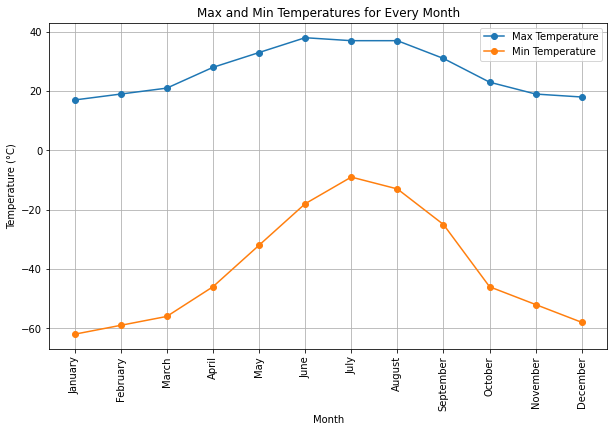

In [5]:
max_temp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
months_nb = np.arange(1,13)

plt.figure(figsize=(10, 6))

plt.plot(months, max_temp, label='Max Temperature', marker='o')
plt.plot(months, min_temp, label='Min Temperature', marker='o')

plt.title('Max and Min Temperatures for Every Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.show()

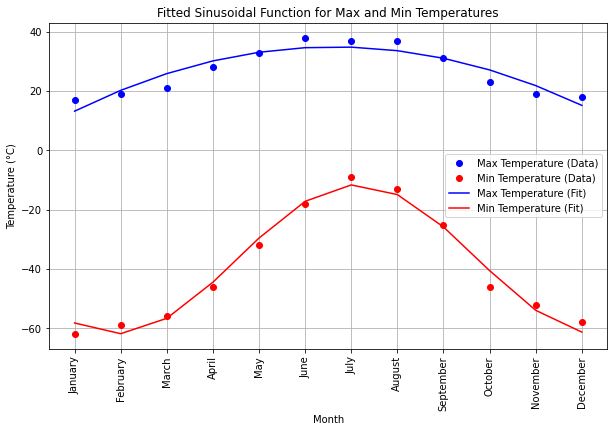

In [6]:
#Using a sinusoidal function for the minimum values and the quadratic function for the maximum values
def sinusoidal_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

params_max, _ = curve_fit(quadratic_function, months_nb, max_temp)
params_min, _ = curve_fit(sinusoidal_function, months_nb, min_temp)

fit_curve_max = quadratic_function(months_nb, *params_max)
fit_curve_min = sinusoidal_function(months_nb, *params_min)


plt.figure(figsize=(10, 6))

plt.plot(months, max_temp, 'bo', label='Max Temperature (Data)')
plt.plot(months, min_temp, 'ro', label='Min Temperature (Data)')

plt.plot(months, fit_curve_max, 'b-', label='Max Temperature (Fit)')
plt.plot(months, fit_curve_min, 'r-', label='Min Temperature (Fit)')

plt.title('Fitted Sinusoidal Function for Max and Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [28]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

Load and inspect data

In [7]:
file_name2 = "./data/residuals_261.pkl"
infile = open(file_name2, 'rb')
new_df = pickle.load(infile)
infile.close()

In [8]:
nested_dict = new_df.item()
residuals = nested_dict['residuals']
distances = nested_dict['distances']
df = pd.DataFrame({'Residuals': residuals, 'Distances': distances})
print(df)

       Residuals  Distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


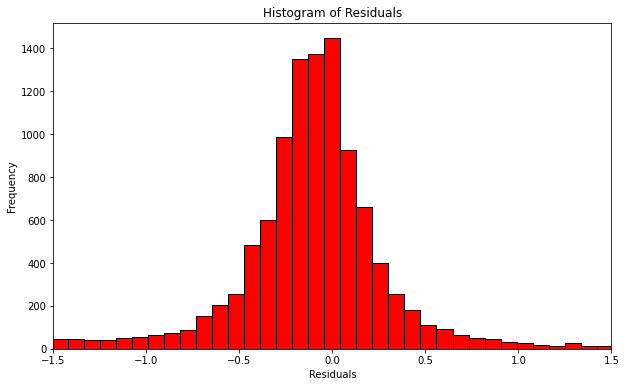

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Residuals'], bins=2000, color='red', edgecolor='black')  # 'auto' determines the bins automatically

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-1.5, 1.5)

plt.show()

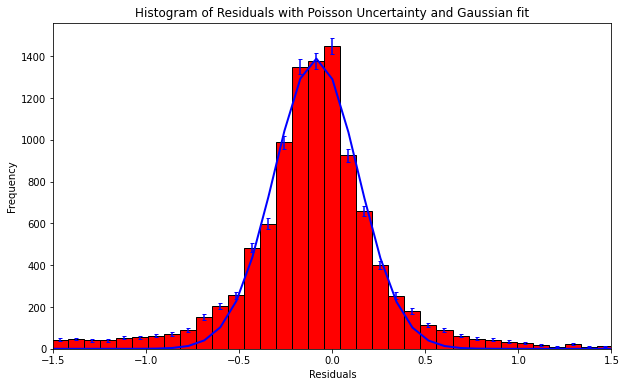

In [10]:
plt.figure(figsize=(10, 6))

counts, bins, _ = plt.hist(df['Residuals'], bins=2000, color='red', edgecolor='black')  # 'auto' determines the bins automatically

#Find poisson uncertainty and add to the plot
poisson_uncertainty = np.sqrt(counts)
plt.errorbar(bins[:-1] + 0.5 * (bins[1] - bins[0]), counts, yerr=poisson_uncertainty, fmt='none', color='blue', ecolor='blue', capsize=2)

#Since the plot looks similar to a Gaussian function shape, I try to fit that
def gaussian(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * std_dev**2))

#Calculate and plot gaussian function
params, covariance = curve_fit(gaussian, bins[:-1] + 0.5 * (bins[1] - bins[0]), counts, p0=[1, np.mean(residuals), np.std(residuals)])
plt.plot(bins[:-1] + 0.5 * (bins[1] - bins[0]), gaussian(bins[:-1] + 0.5 * (bins[1] - bins[0]), *params), color='blue', linewidth=2)

plt.title('Histogram of Residuals with Poisson Uncertainty and Gaussian fit')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-1.5, 1.5)

plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [21]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

Load data

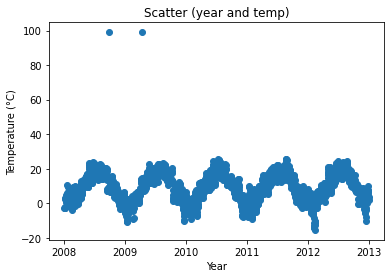

In [11]:
file_name = "./munich_temperatures_average_with_bad_data.txt"
df = pd.read_csv(file_name, header = None, sep = ' ')

year = df[0].tolist()
temp = df[1].tolist()

#Finding for all 2012 as well. If to 2012 is meant until 2012, replace "2013" with "2012"
ind = [i for i, years in enumerate(year) if 2008 <= years <= 2013]

year2 = year[ind[0]:ind[-1]]
temp2 = temp[ind[0]:ind[-1]]

plt.scatter(year2, temp2)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Scatter (year and temp)')
plt.show()


In [12]:
def fit_func(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = curve_fit(fit_func, year2, temp2, p0=[-10, 1, 10])
mu_temp2 = np.mean(temp2)

print('Best fit values are:')
print('a:', popt[0])
print('b:', popt[1])
print('c:', popt[2])
print('Average temperature is:', round(mu_temp2,1), 'celcius')

#as seen in the plot, there are two temperatures that doesn't make sense.. 
sort = sorted(temp2, key=lambda x: -x)
max_temp = round(sort[2],1)

print('Max temp is', max_temp, 'and min temp is', round(np.min(temp2),1))
print('The variable b is used for phase shifting. If its positive it shifts to the right, and to the left if its negative')


Best fit values are:
a: -10.022354388833419
b: -0.24076971050300994
c: 9.348785293908138
Average temperature is: 9.4 celcius
Max temp is 25.7 and min temp is -15.4
The variable b is used for phase shifting. If its positive it shifts to the right, and to the left if its negative


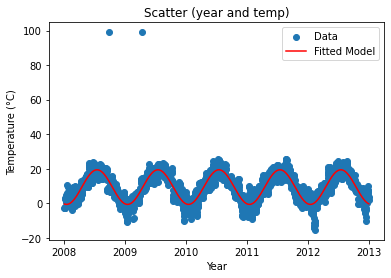

In [14]:
plt.scatter(year2, temp2, label='Data')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Scatter (year and temp) with fitted model')

x_fit = np.linspace(min(year2), max(year2), 1000)
plt.plot(x_fit, fit_func(x_fit, *popt), 'r-', label='Fitted Model')

plt.legend()
plt.show()